## 逻辑回归

### 数据探索

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy  import *
url = "https://coding.net/u/HongHuangNeu/p/Machine-Learning-Notes-Data/git/raw/master/LogisticRegression/testSet.txt"
df = pd.read_csv(url,sep='\t')
df[:3]

,x1,x2,label
0,-0.017612,14.053064,0
1,-1.395634,4.662541,1
2,-0.752157,6.538620,0


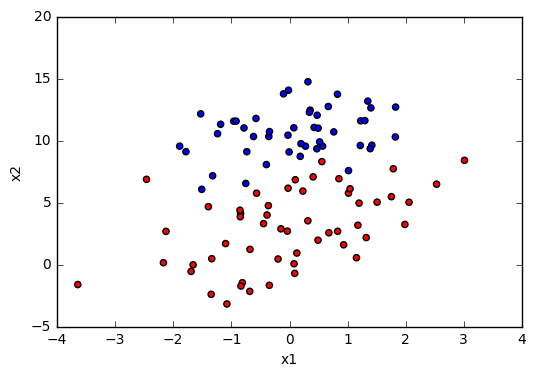

In [18]:
cmap = {1: 'red', 0: 'blue'}
df.plot(x='x1', y='x2', kind='scatter', c=[cmap.get(c, 'black') for c in df.label])

plt.show()

### sigmoid函数


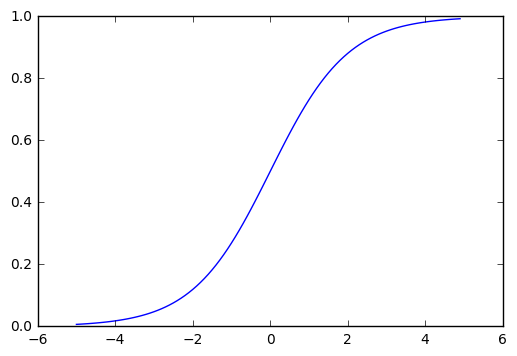

In [19]:
def sigmoid(t):
    return 1.0/(1+exp(-t))

#visualize sigmoid function
x = arange(-5.0,5.0,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.show()

### 构造分类器
在博客中已经提到，要实现逻辑回归，我们使用梯度上升的方法优化，也就是反复执行下列迭代：
$$w_{new}=w_{old}+\alpha (\sum_{i=1}^{m} (y_{i}-s(w^{T} x_{i}))x_{i})$$

注意到 $y_{i}-s(w^{T} x_{i})$ 是一个数, 我们把他叫 $E_i$. 假设一共有m个训练点 $x_{i}$ 是一个列向量,$w_{new}$的第 j 维是$w_{old}$第j维加上$E_i$（一个数）与$x_i$第j维的乘积之和, 其中 $1\le i \le m $  

#### 载入数据
载入数据以及相应的类标签，注意每一行是一个数据点。同时我们加一个全是1的列来考虑偏移量。

In [20]:
matrix = df.values
#get the features
f = matrix[:,0:2]
#create a column of ones
list_one = ones((f.shape[0],1))
#append this "1" column to the features
features = column_stack((f,list_one))
#get the lables
label_list = matrix[:,2]
labels = mat(label_list).transpose()
features[:10]

array([[ -0.017612,  14.053064,   1.      ],
       [ -1.395634,   4.662541,   1.      ],
       [ -0.752157,   6.53862 ,   1.      ],
       [ -1.322371,   7.152853,   1.      ],
       [  0.423363,  11.054677,   1.      ],
       [  0.406704,   7.067335,   1.      ],
       [  0.667394,  12.741452,   1.      ],
       [ -2.46015 ,   6.866805,   1.      ],
       [  0.569411,   9.548755,   1.      ],
       [ -0.026632,  10.427743,   1.      ]])

#### 计算 E_i

In [21]:
dataSet = mat(features)
#number of training points
numberOfPoints = features.shape[0]

#number of features
numberOfFeatures = features.shape[1]

#initiate weight matrix with all 1s
weights = mat(ones((numberOfFeatures,1)))
weights

#wx, ech row i is the result for w^Tx_i
wx = sigmoid(dataSet*weights)

#calculate E_i for all the numberOfPoints training points. The resulting E_i comes in rows
E = labels-sigmoid(dataSet*weights)
#The resulting E is a column vector where row i correspond to E_i
E[:10]

matrix([[ -9.99999705e-01],
        [  1.38311131e-02],
        [ -9.98872318e-01],
        [ -9.98920829e-01],
        [ -9.99996191e-01],
        [  2.08776178e-04],
        [ -9.99999448e-01],
        [  4.46658302e-03],
        [ -9.99985160e-01],
        [ -9.99988817e-01]])

#### 梯度上升迭代部分的实现

观察E。他的每一行对应于当前直线在每一个训练点上面的误差。注意到$w_{new}$的第j维是$w_{old}$的第j维加上$E_i$以及m个$x_i$的第j维乘积之和 ($1\le i \le m$). 假设包含训练点的数据矩阵在左边，根据矩阵乘法法则， 数据矩阵的列数应该是训练点的个数，这个矩阵的行数应该是特征的维数，因此我们要做一个转置：

In [22]:
dataSet.transpose()*E

matrix([[ -17.14703987],
        [-511.71675367],
        [ -36.41425331]])

结果是一个三维的列向量，正是我们所需要的

#### 编写完整的分类器训练函数
前面讨论了编写这个分类器训练函数的所有难点，现在我们把各个部分组合起来写一个完整的训练函数：


In [23]:
#features: each row is a feature vector with 1 added
#classLabels: array of training labels
def gradeintAscent(features,classLabels):
    labels = mat(classLabels).transpose()
    dataSet = mat(features)
    numberOfPoints = features.shape[0]
    numberOfFeatures = features.shape[1]
    #a columns vector with weights
    weights = mat(ones((numberOfFeatures,1)))
    alpha = 0.001
    maxCycles = 500
    for k in range(maxCycles):
        error = labels-sigmoid(dataSet*weights)
        weights = weights+alpha*dataSet.transpose()*error
    return weights

weight = gradeintAscent(features,label_list)
weight

matrix([[ 0.48007329],
        [-0.6168482 ],
        [ 4.12414349]])

#### 画出决策直线

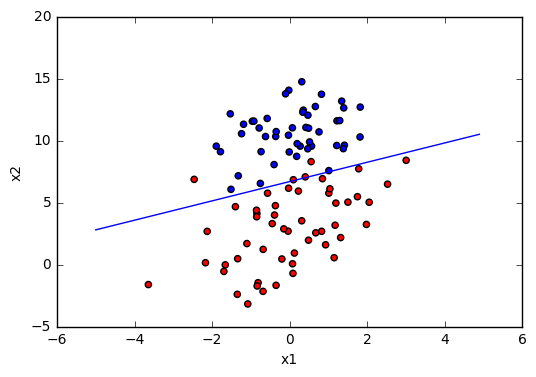

In [24]:


cmap = {1: 'red', 0: 'blue'}
df.plot(x='x1', y='x2', kind='scatter', c=[cmap.get(c, 'black') for c in df.label])
x = arange(-5.0,5.0,0.1)
y = (-weight[2,0]-weight[0,0]*x)/weight[1,0]
plt.plot(x,y)
plt.show()